In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = sns.load_dataset('iris') 
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape 

(150, 5)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum() 

np.int64(1)

In [9]:
df1 = df.drop_duplicates()

In [10]:
df1['species'].unique() 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

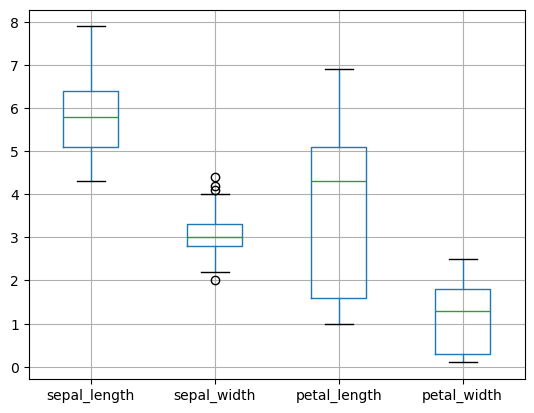

In [11]:
df1.boxplot()
plt.show() 

In [12]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

df1['No_species'] = le.fit_transform(df1['species'])
df1.head() 

,sepal_length,sepal_width,petal_length,petal_width,species,No_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [13]:
df1['No_species'].unique() 

array([0, 1, 2])

In [14]:
Numerical = df1.select_dtypes(include=['int','float']).columns


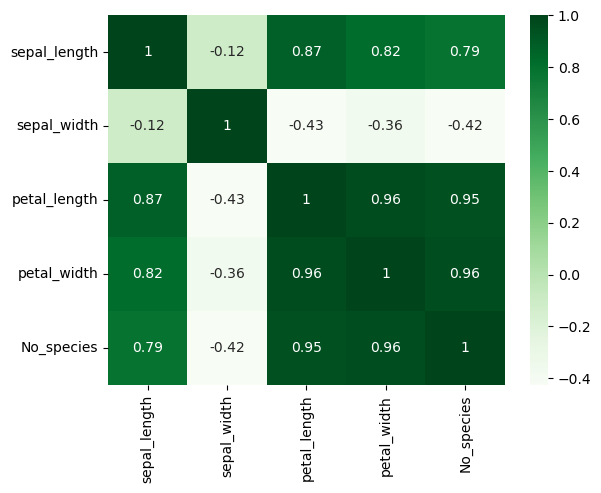

In [15]:
corr = df1[Numerical].corr() 

sns.heatmap(corr, annot=True, cmap='Greens')
plt.show() 

In [16]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'No_species'],
      dtype='object')

In [17]:
x = df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df1['species']

In [18]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier() 
model.fit(x_train, y_train)


RandomForestClassifier()

In [20]:
y_pred = model.predict(x_test)
y_pred 

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [21]:
y_test, y_pred 

(73     versicolor
 18         setosa
 117     virginica
 78     versicolor
 76     versicolor
 31         setosa
 64     versicolor
 140     virginica
 68     versicolor
 82     versicolor
 109     virginica
 12         setosa
 36         setosa
 9          setosa
 19         setosa
 56     versicolor
 136     virginica
 69     versicolor
 55     versicolor
 131     virginica
 29         setosa
 123     virginica
 26         setosa
 127     virginica
 128     virginica
 145     virginica
 110     virginica
 101     virginica
 45         setosa
 30         setosa
 Name: species, dtype: object,
 array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
        'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
        'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
        'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
        'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
        'virginica', 'virginica', 's

In [22]:
from sklearn.metrics import accuracy_score, classification_report 

acc = accuracy_score(y_test, y_pred)*100 
clas = classification_report(y_test, y_pred)
print(f"Classification Report: {clas}")
print(f"Accuracy Score of the model: {acc}") 

Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score of the model: 100.0


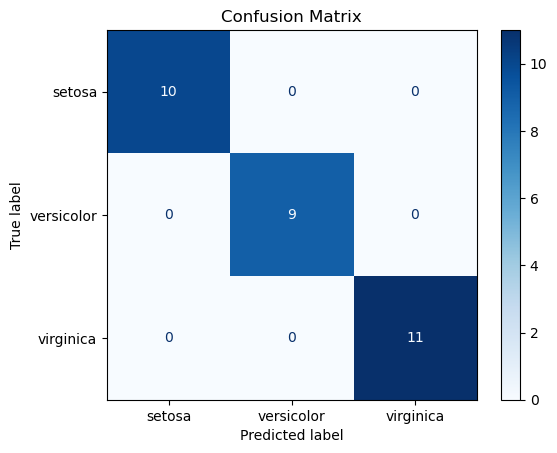

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    display_labels=model.classes_,  # <- matches the 3 iris classes
    cmap='Blues',
)
plt.title('Confusion Matrix')
plt.show()

In [24]:
import pickle 

with open('RandomForst-IRIS.pkl', 'wb') as f:
    pickle.dump(model, f)

In [25]:
df1.to_csv('Cleaned-Iris.csv', index=False)